In [109]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from Theis_drawdown import ReadParams,ReadWells,TheisField


In [110]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

,x,y,Q
0,-1.626947e+01,36.541818,691.2
1,-2.972579e+01,26.765224,691.2
2,-3.804226e+01,12.360680,691.2
3,-3.978088e+01,-4.181139,691.2
4,-3.464102e+01,-20.000000,691.2
5,-2.351141e+01,-32.360680,691.2
6,-8.316468e+00,-39.125904,691.2
7,8.316468e+00,-39.125904,691.2
8,2.351141e+01,-32.360680,691.2
9,3.464102e+01,-20.000000,691.2


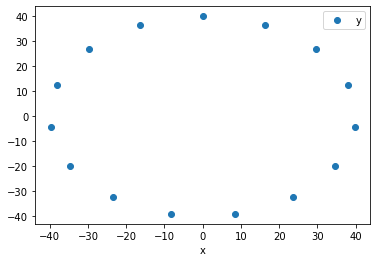

In [127]:
# Create ring of wells; export to wells.txt
origin = (0,0)
radius = 40 # m
split = 15
split_rot = 360/split
Q = 8*1e-3*86400 # L/s to m3/d

coords = []
for i in range(split):
    rot = (i+1)*split_rot
    coords.append(list(rotate(origin, (0,radius), math.radians(rot))))


df = pd.DataFrame(coords, columns=['x','y'])
df['Q'] = Q
df.plot(x='x', y='y', ls='', marker='o')

df.to_csv('wells.txt', index=False, sep='\t')
df


In [148]:
t = 50. # days
TheisField(t)

Reading model parameters ...
Reading well file ...
Calculating ...
Done.


In [149]:
head_change = pd.read_csv('head_change.csv')
head_change.head()

,x,y,dh
0,-500.0,-500.0,11.172860
1,-490.0,-500.0,11.214008
2,-480.0,-500.0,11.255141
3,-470.0,-500.0,11.296241
4,-460.0,-500.0,11.337289


C:\Users\RyanBurgess\AppData\Local\Temp\ipykernel_20196\43900040.py:27: UserWarning: No contour levels were found within the data range.
  cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)


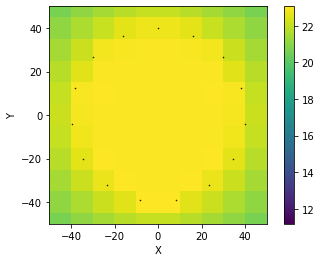

In [150]:
# Plot contour array

Z = head_change.pivot_table(index='x', columns='y', values='dh').T.values

X_unique = np.sort(head_change.x.unique())
Y_unique = np.sort(head_change.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

grid_x, grid_y = np.mgrid[-500:500:100j, -500:500:200j]

grid_z0 = griddata(head_change[['x','y']].values, head_change['dh'].values, (grid_x, grid_y), method='nearest')

fig = plt.figure()
ax = fig.add_subplot(111)

levels = np.linspace(1., 8., 20)
#import matplotlib.cm as cm # matplotlib's color map library
#cpf = ax.contourf(X,Y,Z, levels, cmap=cm.Reds)
line_colors = ['black' for l in levels]



# plots filled contour plot
g = ax.imshow(grid_z0.T, extent=(-500,500,-500,500), origin='lower')
fig.colorbar(g, ax=ax)
ax.plot(df['x'].values, df['y'].values, 'k.', ms=1)
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()